## Problem 1 - Chick Data

### Part 1 - generally describe the dataset in 'chickwts.txt'

"chickwts.txt" contains two columns; the first column is the weight of the chick and the second column is the type of feed. There are coloumn headers in the first row and the columns are delimited by a comma. There are 6 feed types and a total of 71 data points. 

### Part 2 - generate a plot that summarizes all of the data in 'chickwts.txt'

In [1]:
#import necessary packages
import numpy
import pandas
import scipy
import scipy.integrate as spint
from scipy.stats import norm
from scipy.optimize import minimize
from scipy.stats import chi2
from plotnine import *

C:\Users\Hannah\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#load data
chickwts = pandas.read_csv("chickwts.txt",header=0,sep=",")

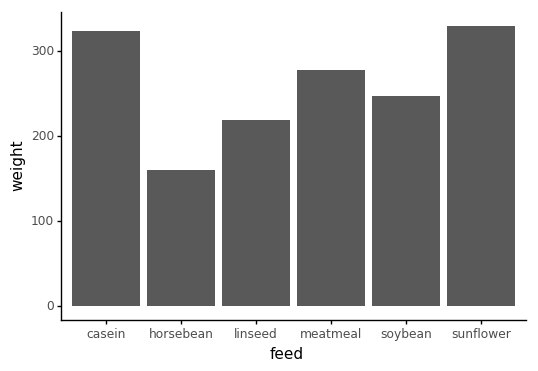

<ggplot: (13120046)>

In [3]:
#code for plot:
ggplot(chickwts,aes(x='feed',y='weight'))+geom_bar(stat="summary",fun_y=numpy.mean)+theme_classic()

### Part 3 - states a null and alternative hypothesis for difference in chick weight  when fed soybean vs. sunflower feed

In [4]:
#Pull out only the feed types we are interested in
Soybean=chickwts.loc[chickwts.feed.isin(['soybean']),:]
Sunflower=chickwts.loc[chickwts.feed.isin(['sunflower']),:]

In [5]:
#Make dataframe to use for models
SoybeanFrame=pandas.DataFrame({'y':Soybean.feed,'x':0})
SunflowerFrame=pandas.DataFrame({'y':Sunflower.feed,'x':0})

In [6]:
#Null model
def nllike_null(p_null,obs_null):
    B0_null=p_null[0]
    sigma_null=p_null[1]
    expected_null=B0_null
    nll_null=-1*norm(expected_null,sigma_null).logpdf(obs_null.y).sum()
    
#Alternative model
def nllike_treat(p_treat,obs_treat):
    B0_treat=p_treat[0]
    B1_treat=p_treat[1]
    sigma_treat=p_treat[2]
    expected_treat=B0_treat+B1_treat*obs_treat.x
    nll_treat=-1*norm(expected_treat,sigma_treat).logpdf(obs_treat.y).sum()
    return nll_treat 

### Part 4 - tests the null hypothesis above using a likelihood ratio test (only chicks fed soybean or sunflower feed)

### Part 5 - interprets the results of the likelihood ratio test